# Example: Contour plot with streamlines 

In this example, we'll plot a tracer field from CAM and overlay streamlines showing the flow.

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

## Load the dataset

In [2]:
ds = xr.open_dataset('../data/co2.nc')
ds.info()

xarray.Dataset {
dimensions:
	lat = 192 ;
	lon = 288 ;

variables:
	float32 CO2(lat, lon) ;
		CO2:mdims = 1 ;
		CO2:units = kg/kg ;
		CO2:long_name = CO2 ;
		CO2:cell_methods = time: mean lev: mean ;
	float32 U(lat, lon) ;
		U:mdims = 1 ;
		U:units = m/s ;
		U:long_name = Zonal wind ;
		U:cell_methods = time: mean lev: mean ;
	float32 V(lat, lon) ;
		V:mdims = 1 ;
		V:units = m/s ;
		V:long_name = Meridional wind ;
		V:cell_methods = time: mean lev: mean ;
	float64 lat(lat) ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;

// global attributes:
	:note = CO2, U, & V from bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004 ;
	:time_period = January 15 2016 ;
}

## Convert units

In [3]:
mwair = 28.966
mwco2 = 44.
with xr.set_options(keep_attrs=True):
    ds['CO2'] = ds.CO2 * 1.0e6 * mwair / mwco2
    ds.CO2.attrs['units'] = 'ppm'

## Make the plot

Text(0.5, 1.0, 'CO$_2$ [ppm]')

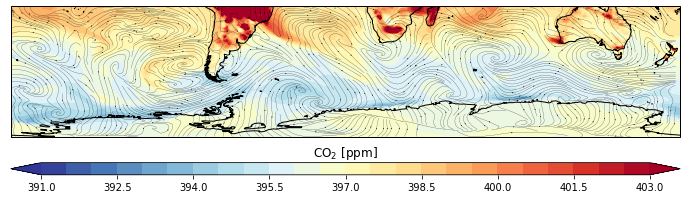

In [4]:
fig = plt.figure(figsize=(12,12))

# create axis with subplot a project
crs_latlon = ccrs.PlateCarree()
ax = fig.add_subplot(111, projection=crs_latlon)
ax.set_extent([-180, 180. , -85, -15], crs=crs_latlon)
ax.coastlines('50m')

# plot CO2
field, lon = add_cyclic_point(ds.CO2, coord=ds.lon)
cf = ax.contourf(lon, ds.lat, field, 
                 levels=np.arange(391,403.5,0.5),
                 cmap='RdYlBu_r',
                 extend='both',
                 transform=ccrs.PlateCarree())

# plot velocity field
uvel, lonu = add_cyclic_point(ds.U, coord=ds.lon)
vvel, lonv = add_cyclic_point(ds.V, coord=ds.lon)

lonu = np.where(lonu>=180.,lonu-360.,lonu)

sp = ax.streamplot(lonu, ds.lat, uvel, vvel,
                   linewidth=0.2,
                   arrowsize = 0.2,
                   density=5,
                   color='k',
                   transform=ccrs.PlateCarree())


cb = plt.colorbar(cf,orientation='horizontal', pad=0.04, aspect=50)
cb.ax.set_title('CO$_2$ [ppm]')